#CH09. 군집화 (Clustering) (실습)

### [1] 실습 진행 관련 설명
군집화에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

처음에는 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기

- (2) (모델 측면) sklearn 라이브러리를 이용하여 K-평균 군집화 불러오기. 또는 직접 함수 구현하기 (K-평균 군집화 모델 정의).

- (3) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기. 또는 직접 구현하기 (K의 값에 따라).

- (4)(결과 확인) 학습 결과 시각화를 통한 결과 확인하기.

## (공통) 데이터 불러오기




In [10]:
'''
(1) (데이터 측면) 데이터 불러오기.
군집화를 위해 임의로 만든 데이터를 활용해서 군집화의 실습에 활용한다.
특징벡터가 총 2개 존재하는데 이번 실습에서는 각각 분할하여 활용한다.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('clustering_data.csv')
x_1 = train.iloc[:, 0]
x_2 = train.iloc[:, 1]

#데이터의 전체 갯수와 특징벡터의 수를 확인해보자.
number_data     = np.size(train, 0)
number_feature  = np.size(train, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 999
number of feature : 2


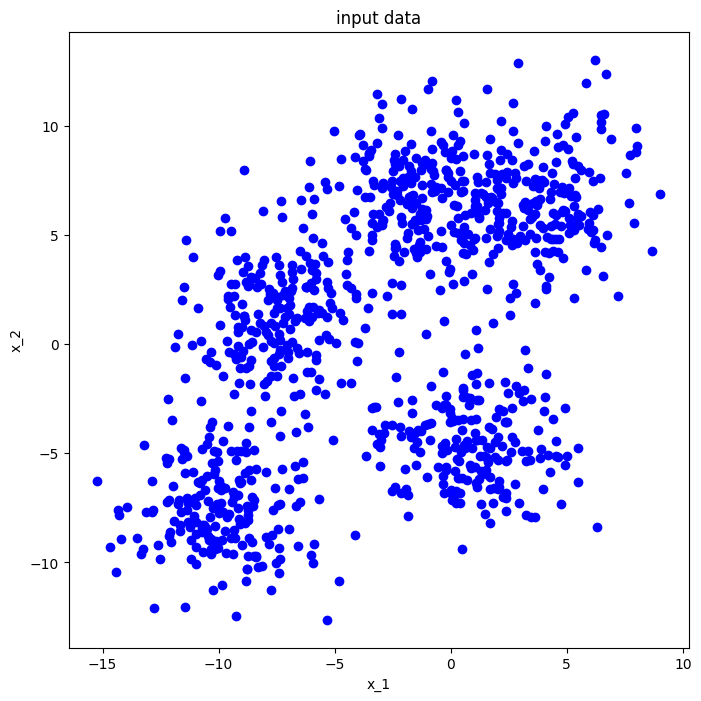

In [11]:
'''
(1-2) (데이터 측면)데이터 시각화
군집화를 시행하기 전 데이터가 어떻게 구성되어 있는지 확인해보자
'''
plt.figure(figsize=(8,8))
plt.title('input data')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x_1,x_2,'o', c="blue")

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




In [12]:
'''
(2) (모델 측면) k-means 군집화 모델 불러오기
sklearn 라이브러리를 통해 구현되어 있는 k-means 군집화 모델을 불러온다.
'''
from sklearn.cluster import KMeans
import pandas as pd

model = KMeans(n_clusters=5)

In [14]:
'''
(3) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기.
fit 함수를 통해 학습을 진행한다.
'''
model.fit(train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

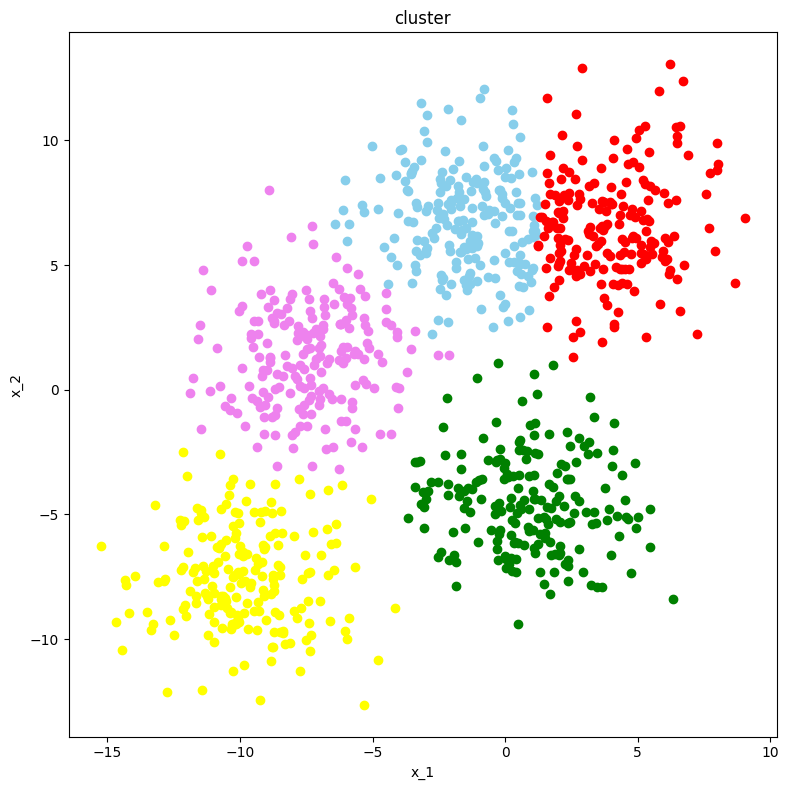

In [16]:
'''
(4)(결과 확인) 학습 결과 시각화를 통한 결과 확인하기.
predict 함수를 통해서 데이터를 가져오고, 해당 데이터로 결과를 시각화 한다.
'''
pred = pd.DataFrame(model.predict(train))

def plot_cluster(feature, label_feature):
    x1 = feature.iloc[:, 0]
    x2 = feature.iloc[:, 1]
    plt.figure(figsize=(8,8))
    plt.title('cluster')
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    #각각 데이터 별 분류된 군집에 따라서 색상을 다르게 표시해준다
    #데이터를 표기할 때 "o"를 사용하면 점 형태로 표현할 수 있다.
    #c는 color을 의미하며 색상을 작성하면 해당 색상으로 데이터를 표기한다.
    plt.plot(x1[label_feature==0], x2[label_feature==0],'o', c="skyblue")
    plt.plot(x1[label_feature==1], x2[label_feature==1],'o', c="yellow")
    plt.plot(x1[label_feature==2], x2[label_feature==2],'o', c="green")
    plt.plot(x1[label_feature==3], x2[label_feature==3],'o', c="red")
    plt.plot(x1[label_feature==4], x2[label_feature==4],'o', c="violet")
    plt.tight_layout()
    plt.show()

plot_cluster(train, pred.values.ravel())

## (두번째 실습) 직접 함수를 구현하는 방법

In [17]:
'''
(2) (모델 측면) k-means 군집화 모델 구현하기
k-means 군집화 모델 직접 구현을 위한 함수를 선언한다.
- 거리 연산 함수
- 중심점 계산 함수
- 클러스터 결정 함수
'''
def compute_distance(feature, center):  # 거리 연산 함수
    n  = np.size(feature, 0)
    m  = np.size(feature, 1)
    distance = np.zeros(shape=(n))

    for i in range(n):
        dist = 0
        for j in range(m):
            feat = feature[i]
            dist = dist + np.power((feat[j]-center[j]), 2)
        distance[i] = np.sqrt(dist)
    return distance

def compute_centroid(feature, label_feature, value_label):  # 중심점 계산 함수
    n  = np.size(feature, 0)
    m  = np.size(feature, 1)
    centroid = np.zeros(shape=(m))
    cnt = 0

    for i in range(n):
        if label_feature[i] == value_label:
            cnt = cnt+1
            for j in range(m):
                feat = feature[i]
                centroid[j] = centroid[j] + feat[j]
    centroid = centroid / cnt
    return centroid

def compute_label(distance):  # 클러스터 결정 함수
    n  = np.size(distance, 0)
    k  = np.size(distance, 1)
    index_label_feature = np.zeros(shape=(n))

    for i in range(n):
        dist = distance[i]
        label = np.argmin(dist)
        index_label_feature[i] = label
    return index_label_feature

In [19]:
'''
(3) (학습 과정) k-means 군집화 알고리즘 수행하기.
(2)에서 구현한 함수를 바탕으로 군집화 알고리즘 수행
'''
train = train.values
number_cluster = 5
number_iteration = 20
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))
loss_iteration = np.zeros(shape=(number_iteration, 1))
centroid_iteration = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_feature = np.zeros(shape=(number_data,1))
label_cluster = [0,1,2,3,4]

duplist = []
for i in range(number_cluster):
    ran = np.random.randint(0,number_data)
    while ran not in duplist:
        ran = np.random.randint(0,number_data)
        duplist.append(ran)
        centroid[i] = train[ran]

for i in range(number_iteration):
    loss = 0
    for k in range(number_cluster):
        distance[:,k] = compute_distance(train, centroid[k])
    label_feature = compute_label(distance)

    for k in range(number_cluster):
        centroid[k] = compute_centroid(train, label_feature, k)
    centroid_iteration[i] = centroid

    for n in range(number_data):
        label = int(label_feature[n])
        loss = loss + distance[n][label]
    loss_iteration[i] = loss / n
    print("iteration = %4d, Error = %5.5f" % (i, loss/n))

iteration =    0, Error = 5.65901
iteration =    1, Error = 3.82163
iteration =    2, Error = 3.12267
iteration =    3, Error = 2.99779
iteration =    4, Error = 2.91717
iteration =    5, Error = 2.84753
iteration =    6, Error = 2.78986
iteration =    7, Error = 2.73121
iteration =    8, Error = 2.64585
iteration =    9, Error = 2.56183
iteration =   10, Error = 2.51055
iteration =   11, Error = 2.48549
iteration =   12, Error = 2.47126
iteration =   13, Error = 2.46836
iteration =   14, Error = 2.46704
iteration =   15, Error = 2.46710
iteration =   16, Error = 2.46708
iteration =   17, Error = 2.46726
iteration =   18, Error = 2.46761
iteration =   19, Error = 2.46761


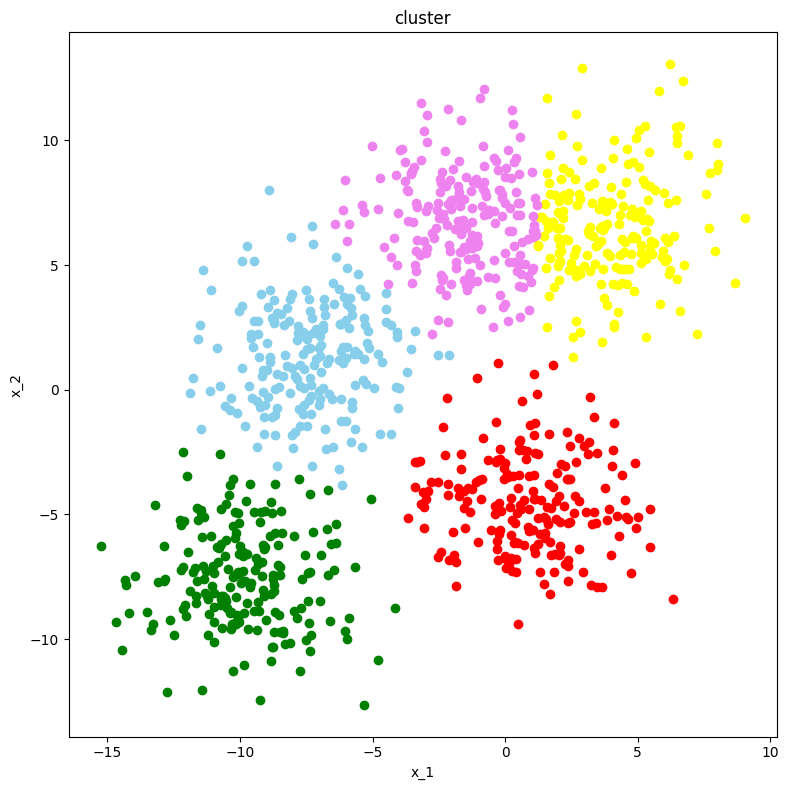

In [20]:
'''
(4)(결과 확인) 학습 결과 시각화를 통한 결과 확인하기.
(3)에서의 군집화 결과를 바탕으로 그 결과를 시각화 한다.
'''
def plot_cluster(feature, label_feature):
    x = feature[:,0]
    y = feature[:,1]
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.plot(x[label_feature==0], y[label_feature==0],'o', c="skyblue")
    plt.plot(x[label_feature==1], y[label_feature==1],'o', c="yellow")
    plt.plot(x[label_feature==2], y[label_feature==2],'o', c="green")
    plt.plot(x[label_feature==3], y[label_feature==3],'o', c="red")
    plt.plot(x[label_feature==4], y[label_feature==4],'o', c="violet")
    plt.tight_layout()
    plt.show()
plot_cluster(train, label_feature)

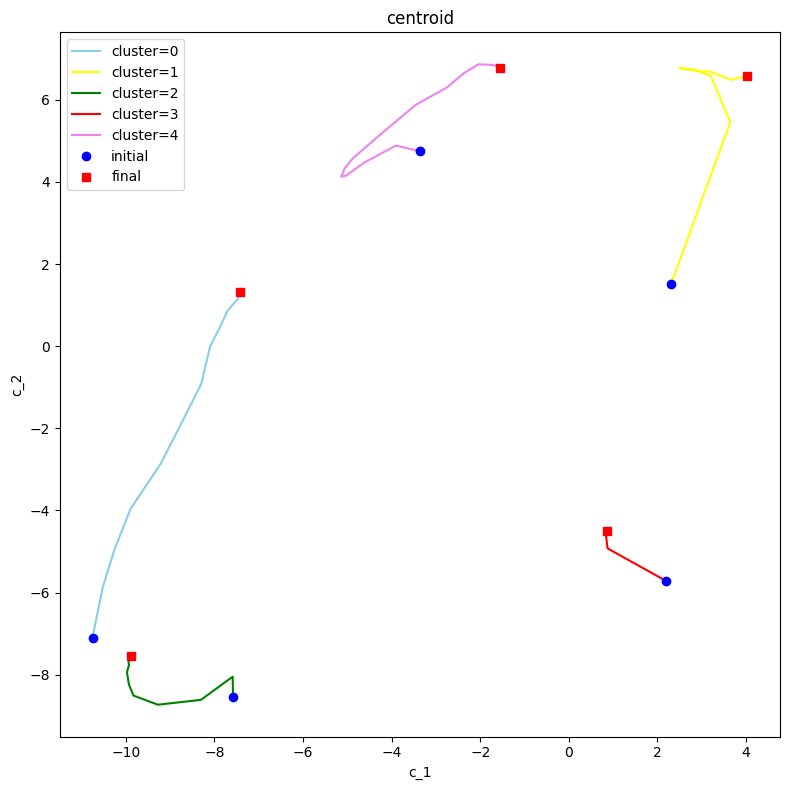

In [21]:
'''
(4-2) (결과 확인) 중심점 이동 경로 시각화
(3)에서의 군집화 결과를 바탕으로 그 결과를 시각화 한다.
'''
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    plt.xlabel("c_1")
    plt.ylabel("c_2")
    plt.plot(centroid_iteration[:,0,0],centroid_iteration[:,0,1], '-', c='skyblue', label="cluster=0")
    plt.plot(centroid_iteration[:,1,0],centroid_iteration[:,1,1], '-', c='yellow', label="cluster=1")
    plt.plot(centroid_iteration[:,2,0],centroid_iteration[:,2,1], '-', c='green', label="cluster=2")
    plt.plot(centroid_iteration[:,3,0],centroid_iteration[:,3,1], '-', c='red', label="cluster=3")
    plt.plot(centroid_iteration[:,4,0],centroid_iteration[:,4,1], '-', c='violet', label="cluster=4")
    plt.plot(centroid_iteration[0,:,0],centroid_iteration[0,:,1], 'o', c='blue', label = "initial")
    plt.plot(centroid_iteration[-1,:,0],centroid_iteration[-1,:,1], 's', c='red', label = "final")
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_centroid(centroid_iteration)